In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
library(tidyverse)

NameError: name 'library' is not defined

In [ ]:
#READ DATA
file = "caffeine.csv"
df=pd.read_csv(file)
df

In [98]:
df2=df.copy()

In [100]:
#ADD CAFFEINE AND CALORIES PER 100ML
df2['Caffeine_per_100ml']= df2["Caffeine (mg)"]/df2["Volume (ml)"]*100
df2['Calories_per_100ml']= df2["Calories"]/df2["Volume (ml)"]*100

df2

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
...,...,...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water,15.498109,0.000000
606,Polar Seltzer Water,354.882000,0,0,Water,0.000000,0.000000
607,Yerbae Sparkling Water,354.882000,0,100,Water,28.178380,0.000000
608,Tonic Water,295.735000,110,0,Water,0.000000,37.195462


In [101]:
df2.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'Caffeine_per_100ml', 'Calories_per_100ml'],
      dtype='object')

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drink               610 non-null    object 
 1   Volume (ml)         610 non-null    float64
 2   Calories            610 non-null    int64  
 3   Caffeine (mg)       610 non-null    int64  
 4   type                610 non-null    object 
 5   Caffeine_per_100ml  610 non-null    float64
 6   Calories_per_100ml  610 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.5+ KB


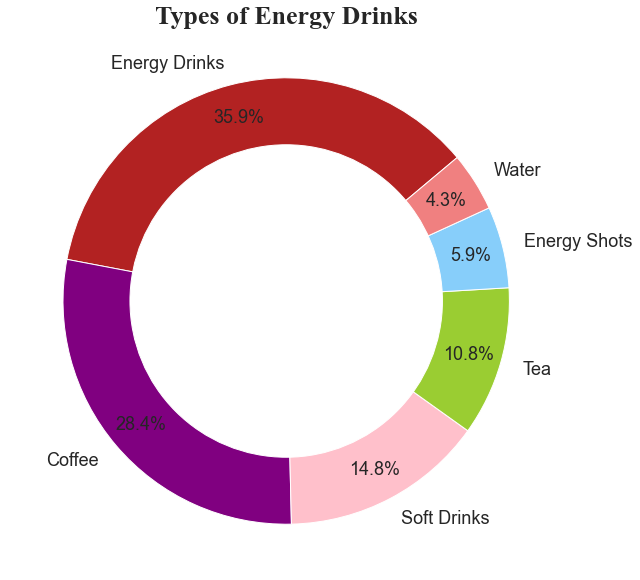

In [103]:
#DONUT CHART - TYPES OF DRINKS

drink_types = df2.type.value_counts().index.tolist()
drink_type_counts = df2.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(10,10))
plt.title("Types of Energy Drinks", fontsize = 26, fontweight = "bold", font = "Times New Roman")
plt.axis("equal")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)
fig.gca().add_artist(centre_circle)
plt.show()

In [104]:
#FILTER DRINKS WITH LESS THAN 500MG

df3=df2.loc[df2["Caffeine (mg)"] <500].reset_index()
df3

,index,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml
0,0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
...,...,...,...,...,...,...,...,...
594,605,Pep Talk Sparkling Water,354.882000,0,55,Water,15.498109,0.000000
595,606,Polar Seltzer Water,354.882000,0,0,Water,0.000000,0.000000
596,607,Yerbae Sparkling Water,354.882000,0,100,Water,28.178380,0.000000
597,608,Tonic Water,295.735000,110,0,Water,0.000000,37.195462


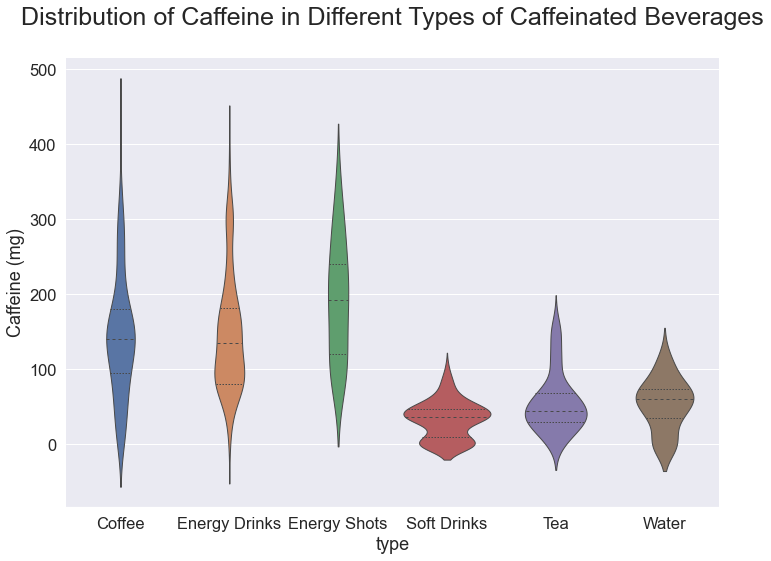

In [105]:
#VIOLIN CHART OF DRINKS WITH CAFFEINE LESS THAN 500MG
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=df3, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Caffeine in Different Types of Caffeinated Beverages\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

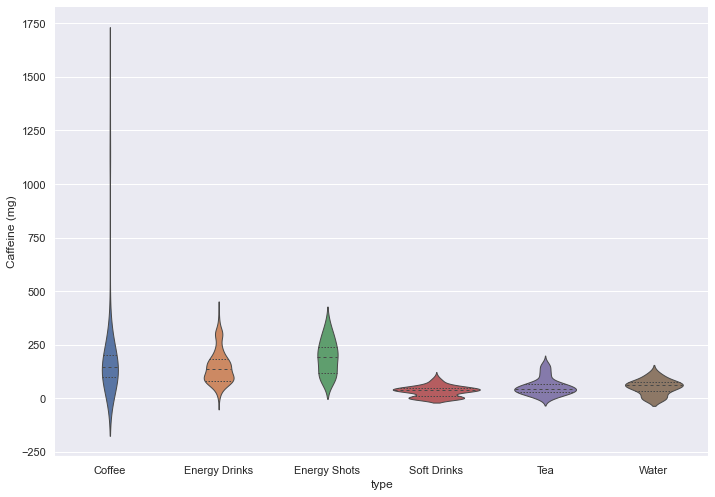

In [106]:
#VIOLIN CHART OF DRINKS WITH CAFFEINE LESS THAN 500MG

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

In [107]:
grouped_df2 = df2.groupby(["type"])
grouped_df2.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
173,28 Black Energy Drink,250.191810,125,80,Energy Drinks,31.975467,49.961667
174,4 Purpose Energy Drink,250.191810,70,70,Energy Drinks,27.978534,27.978534
175,BEEBAD Energy Drink,250.191810,110,80,Energy Drinks,31.975467,43.966267
176,Black Bruin Energy Drink,250.191810,122,38,Energy Drinks,15.188347,48.762587
177,Blu Frog Energy Drink,250.191810,90,80,Energy Drinks,31.975467,35.972401


In [108]:
df2mean = grouped_df2.mean()
df2mean.head()

,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
type,,,,,
Coffee,335.870855,73.497110,200.589595,66.819081,19.479665
Energy Drinks,388.971198,86.671233,147.867580,38.395152,23.188496
Energy Shots,57.742259,16.500000,193.416667,387.558298,40.880874
Soft Drinks,355.243454,111.111111,33.677778,9.506661,31.199914
Tea,360.474080,52.757576,55.863636,17.255757,12.240317


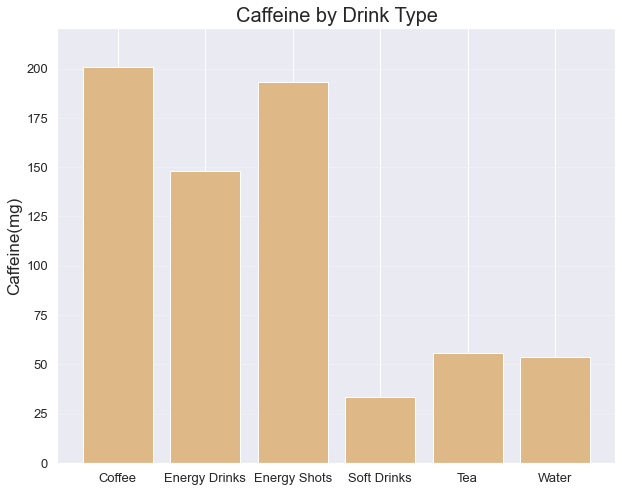

In [109]:
#BAR CHART COMPARING THE CAFFEINE CONCENTRATION AMONG DRINK TYPES

# step 1, get the data
x = df2mean.index
y = df2mean["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Caffeine by Drink Type",fontsize = 20)
plt.ylabel("Caffeine(mg)", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

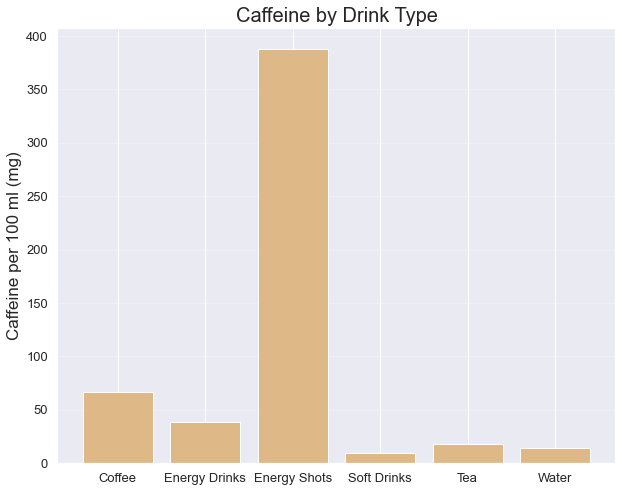

In [111]:
#BAR CHART COMPARING THE CAFFEINE PER 100ML) CONCENTRATION AMONG DRINK TYPES
# step 1, get the data
x = df2mean.index
y = df2mean["Caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Caffeine by Drink Type",fontsize = 20)
plt.ylabel("Caffeine per 100 ml (mg)", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

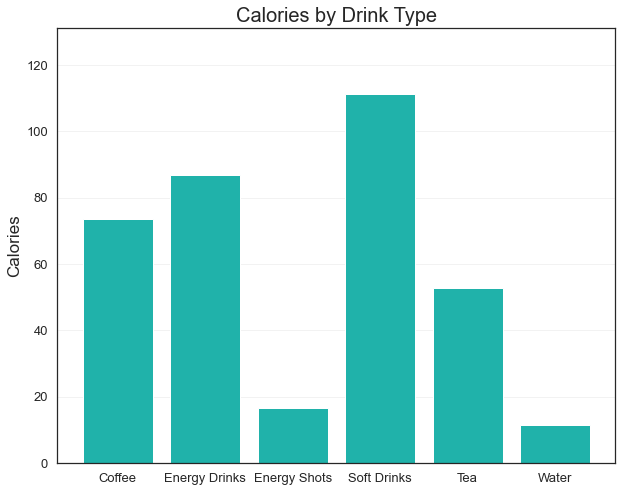

In [73]:
#BAR GRAPH CALORIES BY DRINK TYPE

# step 1, get the data
x = df2mean.index
y= df2mean.Calories


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Calories by Drink Type",fontsize = 20)
plt.ylabel("Calories", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

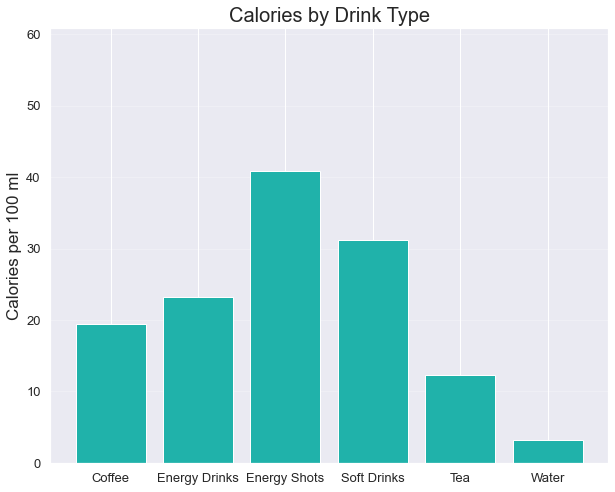

In [112]:
#BAR GRAPH CALORIES 9PER 100 ML) BY DRINK TYPE

# step 1, get the data
x = df2mean.index
y= df2mean.Calories_per_100ml


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Calories by Drink Type",fontsize = 20)
plt.ylabel("Calories per 100 ml", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

In [113]:
#CORRELATION BETWEEN CALORIES, VOLUME AND CAFFEIN

In [114]:
df2.corr()

,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
Volume (ml),1.000000,0.341998,0.110770,-0.457612,-0.043641
Calories,0.341998,1.000000,-0.126021,-0.208557,0.727940
Caffeine (mg),0.110770,-0.126021,1.000000,0.446584,-0.145241
Caffeine_per_100ml,-0.457612,-0.208557,0.446584,1.000000,0.143286
Calories_per_100ml,-0.043641,0.727940,-0.145241,0.143286,1.000000


Text(0.5, 1.0, 'Correlation between Carories, Volume and Caffeine\n')

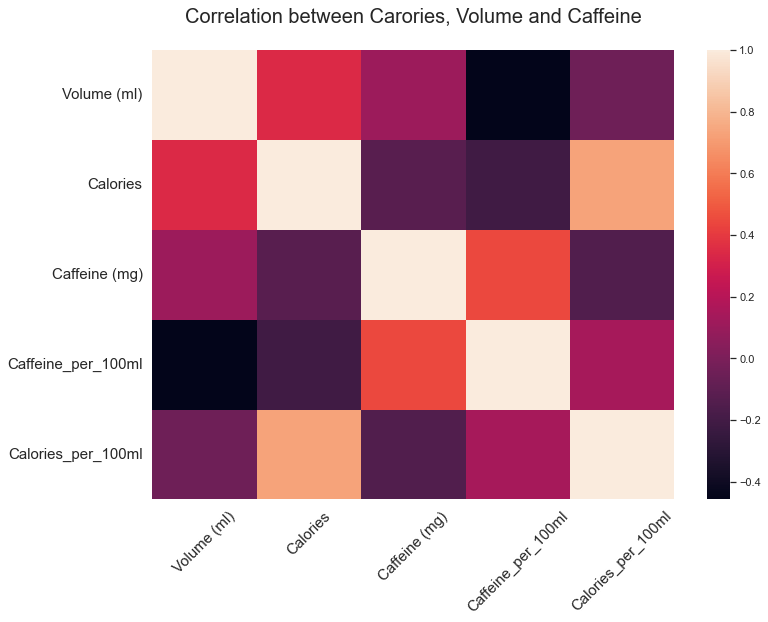

In [171]:
#HEATMAP
sns.heatmap(df2.corr())
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.title("Correlation between Carories, Volume and Caffeine\n",fontsize = 20)

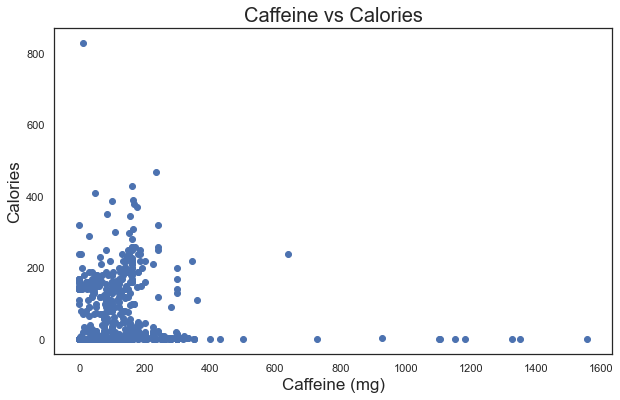

In [76]:
#Scatter graph Calories vs caffeine
plt.figure(figsize=(10,6))
x=df2["Caffeine (mg)"].values
y=df2["Calories"].values

# step 3, customization
plt.title("Caffeine vs Calories",fontsize = 20)
plt.xlabel("Caffeine (mg)", fontsize = 17)
plt.ylabel("Calories", fontsize = 17)

plt.scatter(x,y)
plt.show()

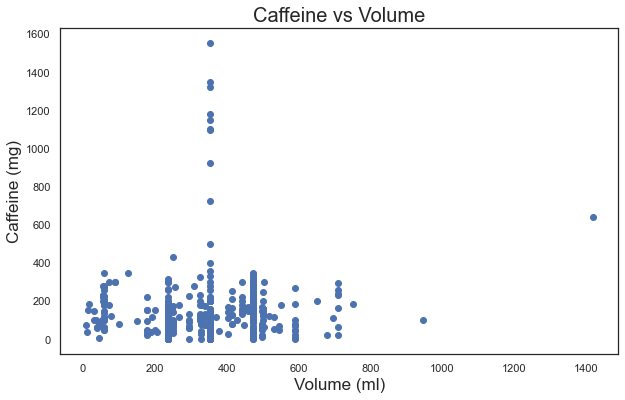

In [79]:
#Scatter graph volumn vs caffeine
plt.figure(figsize=(10,6))
x=df2["Volume (ml)"].values
y=df2["Caffeine (mg)"].values

# step 3, customization
plt.title("Caffeine vs Volume",fontsize = 20)
plt.xlabel("Volume (ml)", fontsize = 17)
plt.ylabel("Caffeine (mg)", fontsize = 17)



plt.scatter(x,y)
plt.show()


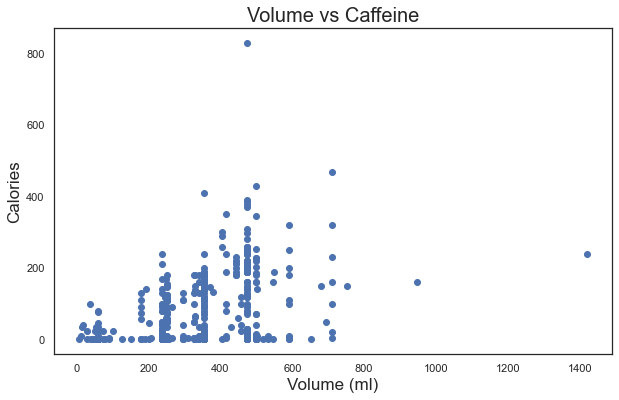

In [80]:
#Scatter graph volumn vs calories
plt.figure(figsize=(10,6))
x=df2["Volume (ml)"].values
y=df2["Calories"].values

# step 3, customization
plt.title("Volume vs Caffeine",fontsize = 20)
plt.xlabel("Volume (ml)", fontsize = 17)
plt.ylabel("Calories", fontsize = 17)



plt.scatter(x,y)
plt.show()


In [23]:
#Top 10 with the highest caffeine concentration among the type


In [24]:
# #BYCOFFEE
# df2coffee=df2.loc[df2.drink.str.contains("Coffee")]
# df2coffee

In [25]:
# df2coffee_sorted=df2coffee.sort_values(["Caffeine (mg)"], ascending=False).reset_index()
# df2coffee_sorted.head(10)


In [26]:
#BY TEA
df2tea=df2.loc[df2.drink.str.contains("Tea")]
df2tea

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
42,Coffee Bean & Tea leaf Coffee,473.17600,5,333,Coffee,70.375505,1.056689
126,Coffee Leaf Tea,236.58800,0,20,Coffee,8.453514,0.000000
230,Monster Dragon Tea,458.38925,40,155,Energy Drinks,33.814057,8.726208
246,ABB Turbo Tea Zero,532.32300,0,120,Energy Drinks,22.542704,0.000000
255,Bang Sweet Tea,473.17600,0,300,Energy Drinks,63.401356,0.000000
...,...,...,...,...,...,...,...
577,Waka Instant Tea,236.58800,0,30,Tea,12.680271,0.000000
578,Yellow Tea,236.58800,0,63,Tea,26.628569,0.000000
579,Yerba Mate Tea,236.58800,0,40,Tea,16.907028,0.000000
581,Zest Highly Caffeinated Tea,236.58800,0,150,Tea,63.401356,0.000000


In [27]:
# df2tea_sorted=df2tea.sort_values(["Caffeine (mg)"], ascending=False).reset_index()
# df2tea_sorted.head(10)

In [28]:
df2tea["drink"].values.tolist()


['Coffee Bean & Tea leaf Coffee',
 'Coffee Leaf Tea',
 'Monster Dragon Tea',
 'ABB Turbo Tea Zero',
 'Bang Sweet Tea',
 'Zest Sparkling Tea',
 'Canada Dry Green Tea Ginger Ale',
 'PG Tips Black Tea',
 'Sencha Green Tea Shot',
 'Xingtea Iced Green Tea',
 'Gold Peak Tea',
 'Pure Leaf Iced Tea',
 'Honest Iced Tea',
 'Nestea Iced Tea',
 'Oi Ocha Green Tea',
 "Teas' Tea Oolong",
 "Inko's White Tea Energy",
 'McDonalds Sweet Tea',
 "Dunkin' Donuts Iced Tea",
 'Fuze Iced Tea',
 'Peace Tea',
 'Lipton Iced Tea',
 'SoBe Green Tea',
 'Arizona Iced Tea',
 'Biggby Iced Tea',
 'Chick-fil-A Iced Tea',
 'Guayaki Yerba Mate Bottled Tea',
 'Snapple Tea',
 'Southern Sweet Tea',
 'Taiwanese Milk Tea',
 "Wendy's Iced Tea",
 'Brisk Iced Tea',
 'Tejava Iced Tea',
 'Turkey Hill Iced Tea',
 'Bigelow Tea',
 'Brown Rice Tea',
 'Chai Tea',
 'Cold Brew Tea',
 'Crystal Light Iced Tea',
 'Fast Lane Black Tea',
 'Guayusa Tea',
 'HICAF Tea',
 'K Cup Tea',
 'Kombucha Tea',
 'Lipton Natural Energy Tea',
 'Lipton Tea',
 

In [29]:
#BY WATER
df2water=df2.loc[df2.drink.str.contains("Water")]
df2water

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
11,Zola Coconut Water Espresso,517.536250,0,125,Coffee,24.152898,0.000000
317,Ugly Energy Water,473.176000,0,160,Energy Drinks,33.814057,0.000000
585,3 Water,499.792150,0,50,Water,10.004159,0.000000
586,Heroec Energy Water,499.792150,0,60,Water,12.004990,0.000000
587,Caribou BOUsted Sparkling Water,340.095250,0,75,Water,22.052646,0.000000
588,Phocus Sparkling Water,340.095250,0,75,Water,22.052646,0.000000
589,Poland Spring Sparkling Energy Water,340.095250,35,75,Water,22.052646,10.291235
590,Perrier Sparkling Water,329.744525,0,0,Water,0.000000,0.000000
591,VitaminWater Energy,591.470000,100,50,Water,8.453514,16.907028
592,VitaRain Zero Enhanced Water,591.470000,0,42,Water,7.100952,0.000000


In [30]:
df2water["drink"].values.tolist()

['Zola Coconut Water Espresso',
 'Ugly Energy Water',
 '3 Water',
 'Heroec Energy Water',
 'Caribou BOUsted Sparkling Water',
 'Phocus Sparkling Water',
 'Poland Spring Sparkling Energy Water',
 'Perrier Sparkling Water',
 'VitaminWater Energy',
 'VitaRain Zero Enhanced Water',
 'Water Joe',
 'Hint Caffeine Kick Water',
 'AHA Sparkling Water',
 'Arti Sparkling Water',
 "Bubbl'r Sparkling Water",
 'Bubly Bounce Sparkling Water',
 'Bubly Sparkling Water',
 'GURU Sparkling Energy Water',
 'La Croix Sparkling Water',
 'Limitless Sparkling Water',
 'Pep Talk Sparkling Water',
 'Polar Seltzer Water',
 'Yerbae Sparkling Water',
 'Tonic Water',
 'MiO Energy Water Enhancer']

In [31]:
#Top Brand

In [32]:
#Peet
df2peet = df2.loc[df2.drink.str.contains('Peet')]
df2peet["brand"]="Peets"
df2peet

C:\Users\hanng\AppData\Local\Temp\ipykernel_19380\1367977815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2peet["brand"]="Peets"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
24,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Peets
25,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Peets
49,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Peets
50,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379,Peets
51,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192,Peets
52,Peet's Caffe Mocha,473.17600,390,165,Coffee,34.870746,82.421763,Peets
53,Peet's Cappuccino,473.17600,140,140,Coffee,29.587299,29.587299,Peets
54,Peet's Iced Coffee,473.17600,0,150,Coffee,31.700678,0.000000,Peets
55,Peet's Iced Latte,473.17600,120,140,Coffee,29.587299,25.360542,Peets
56,Peet's Iced Mocha,473.17600,310,165,Coffee,34.870746,65.514734,Peets


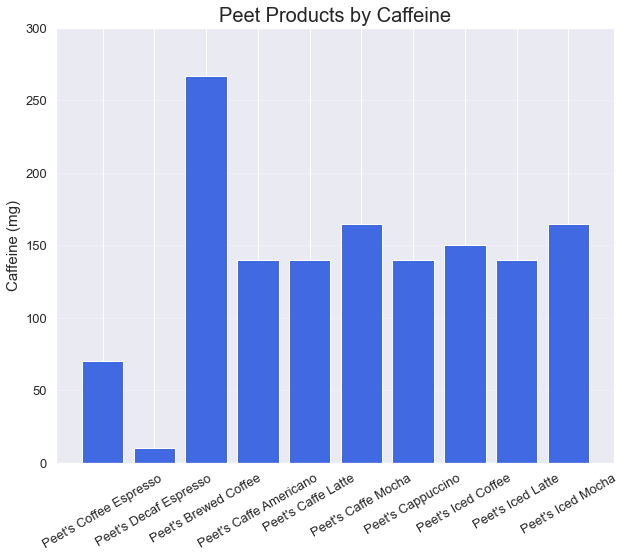

In [142]:
#PEET BRAND by caffeine

# step 1, get the data
x = df2peet.drink
y = df2peet["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="royalblue")

# step 3, customization
plt.title("Peet Products by Caffeine", fontsize = 20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, 300)
plt.xticks(rotation=30, fontsize = 13)
plt.yticks(rotation=0, fontsize = 13)
# step 4, saving/showing
plt.show()

In [34]:
#Starbuck
df2starbucks = df2.loc[df2.drink.str.contains('Starbucks')]
df2starbucks["brand"]="Starbucks"
df2starbucks

C:\Users\hanng\AppData\Local\Temp\ipykernel_19380\992221405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2starbucks["brand"]="Starbucks"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee,62.425950,72.830276,Starbucks
16,Starbucks Bottled Frappuccino,405.15695,300,110,Coffee,27.149972,74.045379,Starbucks
29,Starbucks Bottled Iced Coffee,1419.52800,240,640,Coffee,45.085409,16.907028,Starbucks
57,Starbucks Caramel Macchiato,473.17600,250,150,Coffee,31.700678,52.834463,Starbucks
58,Starbucks Cold Brew Coffee,473.17600,5,205,Coffee,43.324260,1.056689,Starbucks
59,Starbucks Decaf Coffee,473.17600,0,25,Coffee,5.283446,0.000000,Starbucks
60,Starbucks Grande Caffe Americano,473.17600,15,225,Coffee,47.551017,3.170068,Starbucks
61,Starbucks Grande Caffe Latte,473.17600,190,150,Coffee,31.700678,40.154192,Starbucks
62,Starbucks Grande Caffe Mocha,473.17600,370,175,Coffee,36.984124,78.195006,Starbucks
63,Starbucks Grande Cappuccino,473.17600,140,150,Coffee,31.700678,29.587299,Starbucks


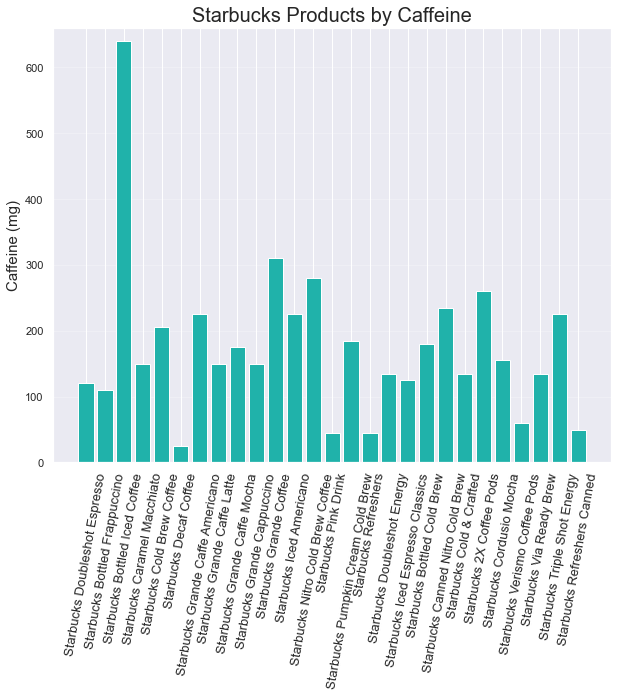

In [146]:
#Starbuck by caffeine
# step 1, get the data
x = df2starbucks.drink
y = df2starbucks["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Starbucks Products by Caffeine", fontsize = 20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=80, fontsize = 13)

# step 4, saving/showing
plt.show()

In [36]:
#dunkin
df2dunkin = df2.loc[df2.drink.str.contains('Dunkin')]
df2dunkin["brand"]="Dunkin"
df2dunkin

C:\Users\hanng\AppData\Local\Temp\ipykernel_19380\2153019293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2dunkin["brand"]="Dunkin"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
6,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee,55.939303,33.396599,Dunkin
15,Bottled Iced Coffee Dunkin Donuts,405.15695,260,171,Coffee,42.205866,64.172662,Dunkin
31,Dunkin' Cold Brew,709.76400,5,260,Coffee,36.631895,0.704460,Dunkin
32,Dunkin' Donuts Iced Coffee,709.76400,20,297,Coffee,41.844895,2.817838,Dunkin
33,Dunkin' Donuts Iced Latte,709.76400,100,166,Coffee,23.388056,14.089190,Dunkin
76,Dunkin' Donuts Brewed Coffee,414.02900,5,210,Coffee,50.721085,1.207645,Dunkin
77,Dunkin' Donuts Dunkaccino,414.02900,350,83,Coffee,20.046905,84.535141,Dunkin
78,Dunkin' Donuts Extra Charged Coffee,414.02900,10,252,Coffee,60.865302,2.415290,Dunkin
79,Dunkin' Donuts Latte,414.02900,100,166,Coffee,40.093810,24.152898,Dunkin
531,Dunkin' Donuts Iced Tea,709.76400,230,63,Tea,8.876190,32.405137,Dunkin


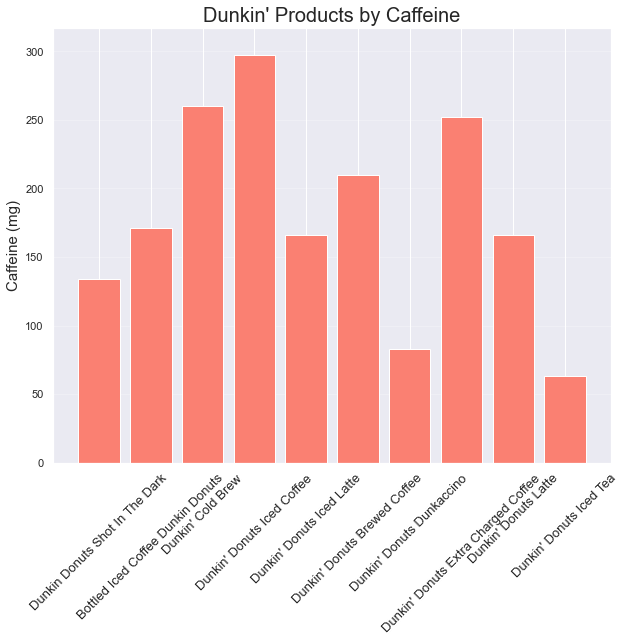

In [150]:
#Dunkin'by caffeine
# step 1, get the data
x = df2dunkin.drink
y = df2dunkin["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="salmon")

# step 3, customization
plt.title("Dunkin' Products by Caffeine", fontsize=20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=45, fontsize = 13)

# step 4, saving/showing
plt.show()

In [38]:
#redbull
df2nescafe = df2.loc[df2.drink.str.contains('Nescafe')]
df2nescafe["brand"]="Nescafe"
df2nescafe

C:\Users\hanng\AppData\Local\Temp\ipykernel_19380\2076203025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2nescafe["brand"]="Nescafe"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
4,Nescafe Gold,250.19181,0,66,Coffee,26.379760,0.000000,Nescafe
142,Nescafe Dolce Gusto,236.58800,0,106,Coffee,44.803625,0.000000,Nescafe
143,Nescafe Ice Java,236.58800,50,100,Coffee,42.267571,21.133785,Nescafe
144,Nescafe Ricoffy,236.58800,10,6,Coffee,2.536054,4.226757,Nescafe
168,Nescafe 3 in 1 Instant Coffee,177.44100,74,50,Coffee,28.178380,41.704003,Nescafe


In [132]:
df2coca_cola = df2.loc[df2.drink.str.contains("Coca")].reset_index(drop = True)
df2coca_cola["brand"]="Coca_Cola"
df2coca_cola

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml,brand
0,Coca-Cola Cherry Vanilla,354.882,140,34,Energy Drinks,9.580649,39.449733,Coca_Cola
1,Coca-Cola Energy,354.882,140,114,Energy Drinks,32.123354,39.449733,Coca_Cola
2,Cocaine Energy Drink,354.882,90,280,Energy Drinks,78.899465,25.360542,Coca_Cola
3,Coca-Cola Caffeine Free,354.882,140,0,Soft Drinks,0.000000,39.449733,Coca_Cola
4,Coca-Cola Cherry,354.882,150,34,Soft Drinks,9.580649,42.267571,Coca_Cola
5,Coca-Cola Cherry Zero Sugar,354.882,0,34,Soft Drinks,9.580649,0.000000,Coca_Cola
6,Coca-Cola Classic,354.882,140,34,Soft Drinks,9.580649,39.449733,Coca_Cola
7,Coca-Cola Orange Vanilla,354.882,140,34,Soft Drinks,9.580649,39.449733,Coca_Cola
8,Coca-Cola Vanilla,354.882,150,34,Soft Drinks,9.580649,42.267571,Coca_Cola
9,Coca-Cola Vanilla Zero Sugar,354.882,0,34,Soft Drinks,9.580649,0.000000,Coca_Cola


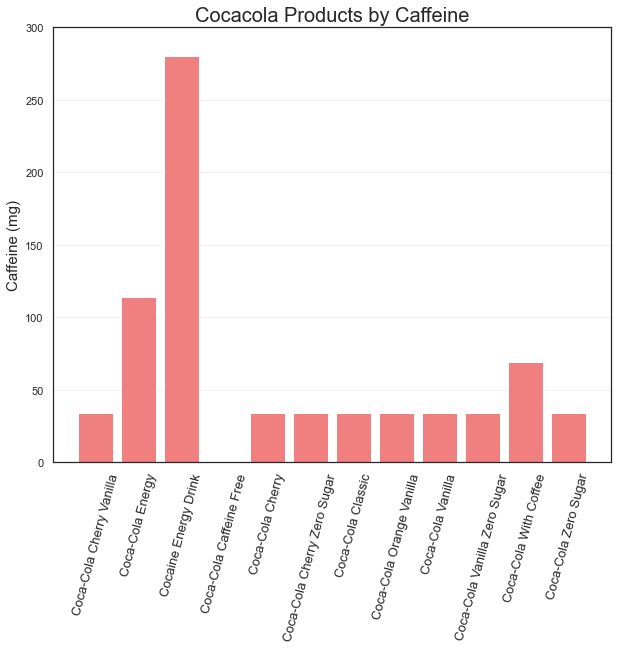

In [170]:
#Coca Cola by caffeine
# step 1, get the data
x = df2coca_cola.drink
y = df2coca_cola["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightcoral")

# step 3, customization
plt.title("Cocacola Products by Caffeine", fontsize=20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=75, fontsize = 13)

# step 4, saving/showing
plt.show()

In [133]:
df2monster = df2.loc[df2.drink.str.contains('Monster')].reset_index(drop = True)
df2monster["brand"]="Monster"
df2monster

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml,brand
0,Espresso Monster,248.417400,170,160,Coffee,64.407727,68.433210,Monster
1,Monster Hydro,751.166900,150,188,Energy Drinks,25.027727,19.968931,Monster
2,Monster Import,550.067100,190,179,Energy Drinks,32.541484,34.541241,Monster
3,Monster Ripper Energy Juice (UK),500.087885,185,160,Energy Drinks,31.994376,36.993498,Monster
4,Monster The Doctor VR46 (UK),500.087885,219,160,Energy Drinks,31.994376,43.792303,Monster
5,Monster Dragon Tea,458.389250,40,155,Energy Drinks,33.814057,8.726208,Monster
6,Monster Rehab,458.389250,25,170,Energy Drinks,37.086385,5.453880,Monster
7,Mega Monster Energy Drink,709.764000,320,240,Energy Drinks,33.814057,45.085409,Monster
8,Monster Assault,473.176000,210,160,Energy Drinks,33.814057,44.380949,Monster
9,Monster Energy,473.176000,210,160,Energy Drinks,33.814057,44.380949,Monster


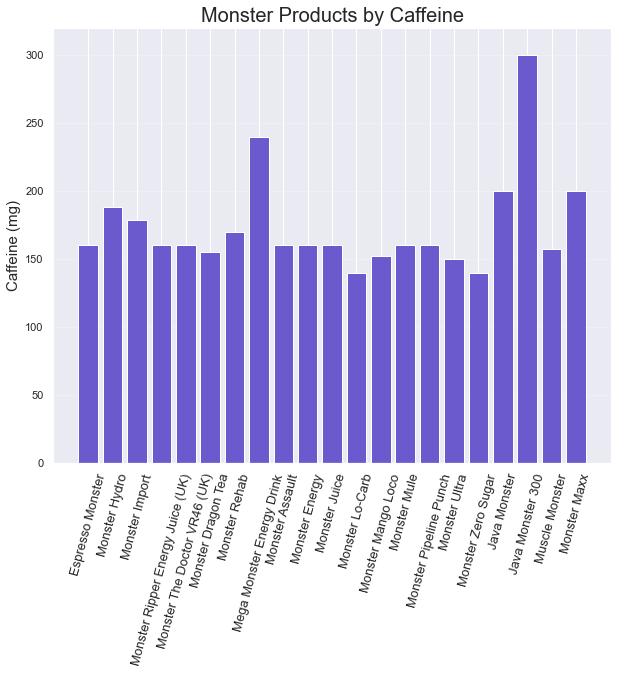

In [137]:
#Monster by caffeine
# step 1, get the data
x = df2monster.drink
y = df2monster["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="slateblue")

# step 3, customization
plt.title("Monster Products by Caffeine", fontsize=20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=75, fontsize = 13)

# step 4, saving/showing
plt.show()

In [41]:
# Merge the two DataFrames, Starbuck & Peet
merge1df = pd.merge(df2peet, df2starbucks, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")
merge1df


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Peets
1,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Peets
2,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Peets
3,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379,Peets
4,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192,Peets
5,Peet's Caffe Mocha,473.17600,390,165,Coffee,34.870746,82.421763,Peets
6,Peet's Cappuccino,473.17600,140,140,Coffee,29.587299,29.587299,Peets
7,Peet's Iced Coffee,473.17600,0,150,Coffee,31.700678,0.000000,Peets
8,Peet's Iced Latte,473.17600,120,140,Coffee,29.587299,25.360542,Peets
9,Peet's Iced Mocha,473.17600,310,165,Coffee,34.870746,65.514734,Peets


In [42]:
merge1df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drink               37 non-null     object 
 1   Volume (ml)         37 non-null     float64
 2   Calories            37 non-null     int64  
 3   Caffeine (mg)       37 non-null     int64  
 4   type                37 non-null     object 
 5   caffeine_per_100ml  37 non-null     float64
 6   calories_per_100ml  37 non-null     float64
 7   brand               37 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 2.6+ KB


In [43]:
# Merge the two DataFrames, Starbuck & Peet &Dunkin'
merge2df = pd.merge(merge1df, df2dunkin, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")
merge2df

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Peets
1,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Peets
2,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Peets
3,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379,Peets
4,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192,Peets
5,Peet's Caffe Mocha,473.17600,390,165,Coffee,34.870746,82.421763,Peets
6,Peet's Cappuccino,473.17600,140,140,Coffee,29.587299,29.587299,Peets
7,Peet's Iced Coffee,473.17600,0,150,Coffee,31.700678,0.000000,Peets
8,Peet's Iced Latte,473.17600,120,140,Coffee,29.587299,25.360542,Peets
9,Peet's Iced Mocha,473.17600,310,165,Coffee,34.870746,65.514734,Peets


In [44]:
merge2df_grouped=merge2df.groupby(["brand"])[["Volume (ml)","Calories","Caffeine (mg)","caffeine_per_100ml","calories_per_100ml"]].mean().reset_index()
merge2df_grouped

,brand,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
0,Dunkin,513.987430,116.000000,180.20000,38.061331,25.989686
1,Peets,387.412850,116.500000,138.70000,45.656021,24.620860
2,Starbucks,432.868415,113.888889,175.37037,42.616031,27.140750


In [45]:
# Merge the two DataFrames, Starbuck & Peet &Dunkin' & Monster
merge3df = pd.merge(merge2df, df2monster, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")
merge3df

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Peets
1,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Peets
2,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Peets
3,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379,Peets
4,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192,Peets
...,...,...,...,...,...,...,...,...
63,Monster Zero Sugar,473.17600,10,140,Energy Drinks,29.587299,2.113379,Monster
64,Java Monster,443.60250,220,200,Energy Drinks,45.085409,49.593950,Monster
65,Java Monster 300,443.60250,200,300,Energy Drinks,67.628113,45.085409,Monster
66,Muscle Monster,443.60250,180,157,Energy Drinks,35.392046,40.576868,Monster


In [46]:
# Merge the two DataFrames, Starbuck & Peet &Dunkin' & Monster &Cocacola
merge4df = pd.merge(merge3df, df2coca_cola, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")
merge4df

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Peets
1,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Peets
2,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Peets
3,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379,Peets
4,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192,Peets
...,...,...,...,...,...,...,...,...
75,Coca-Cola Orange Vanilla,354.88200,140,34,Soft Drinks,9.580649,39.449733,Coca_Cola
76,Coca-Cola Vanilla,354.88200,150,34,Soft Drinks,9.580649,42.267571,Coca_Cola
77,Coca-Cola Vanilla Zero Sugar,354.88200,0,34,Soft Drinks,9.580649,0.000000,Coca_Cola
78,Coca-Cola With Coffee,354.88200,70,69,Soft Drinks,19.443082,19.724866,Coca_Cola


In [47]:
merge4df.sort_values(["Calories"], ascending=True).reset_index()

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,brand
0,0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Peets
1,77,Coca-Cola Vanilla Zero Sugar,354.88200,0,34,Soft Drinks,9.580649,0.000000,Coca_Cola
2,73,Coca-Cola Cherry Zero Sugar,354.88200,0,34,Soft Drinks,9.580649,0.000000,Coca_Cola
3,34,Starbucks Via Ready Brew,236.58800,0,135,Coffee,57.061220,0.000000,Starbucks
4,33,Starbucks Verismo Coffee Pods,236.58800,0,60,Coffee,25.360542,0.000000,Starbucks
...,...,...,...,...,...,...,...,...,...
75,9,Peet's Iced Mocha,473.17600,310,165,Coffee,34.870746,65.514734,Peets
76,54,Mega Monster Energy Drink,709.76400,320,240,Energy Drinks,33.814057,45.085409,Monster
77,43,Dunkin' Donuts Dunkaccino,414.02900,350,83,Coffee,20.046905,84.535141,Dunkin
78,18,Starbucks Grande Caffe Mocha,473.17600,370,175,Coffee,36.984124,78.195006,Starbucks


In [48]:
merge4df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drink               80 non-null     object 
 1   Volume (ml)         80 non-null     float64
 2   Calories            80 non-null     int64  
 3   Caffeine (mg)       80 non-null     int64  
 4   type                80 non-null     object 
 5   caffeine_per_100ml  80 non-null     float64
 6   calories_per_100ml  80 non-null     float64
 7   brand               80 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 5.6+ KB


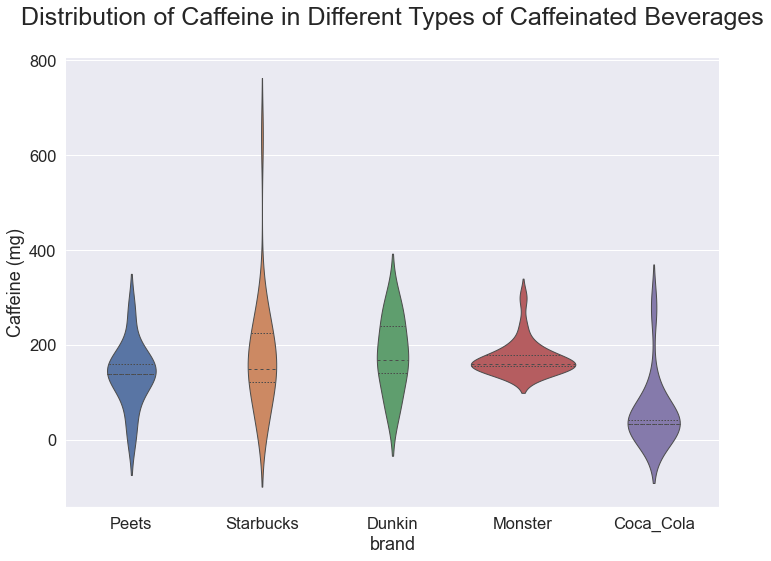

In [49]:
#VIOLIN CHART OF 3 brands
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=merge4df, x="brand", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Caffeine in Different Types of Caffeinated Beverages\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

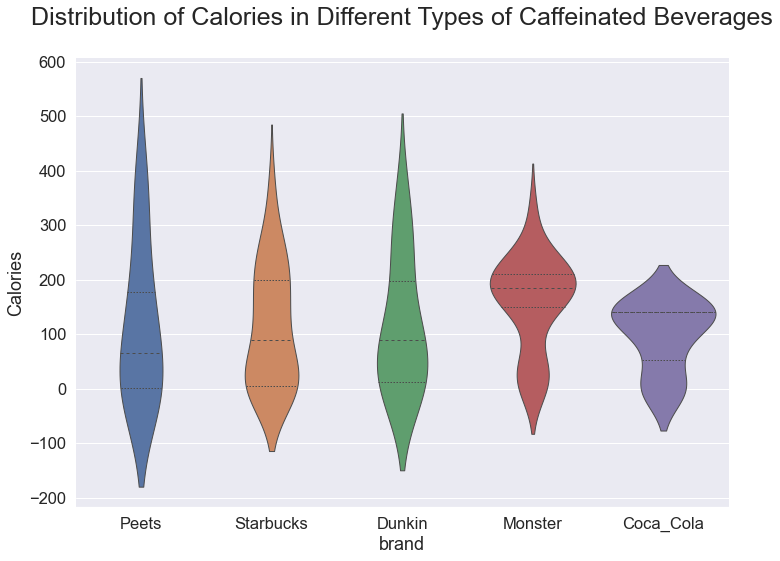

In [50]:
#VIOLIN CHART OF 3 brands
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=merge4df, x="brand", y="Calories", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Calories in Different Types of Caffeinated Beverages\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

findfont: Font family ['Comic Sans'] not found. Falling back to DejaVu Sans.


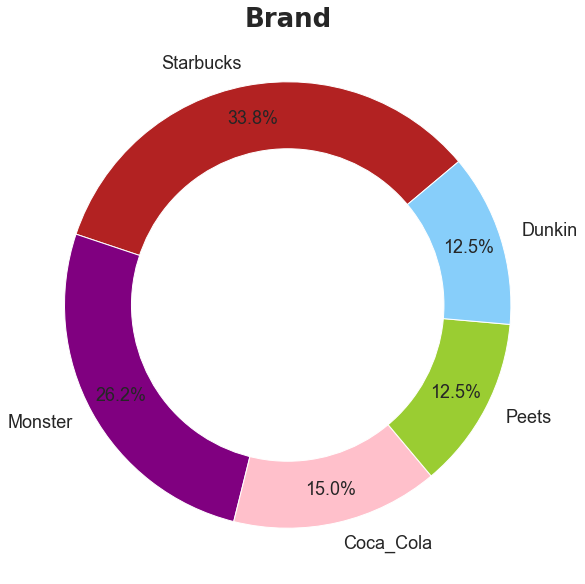

In [51]:
#DONUT CHART - 5 Brand
brand_types = merge4df.brand.value_counts().index.tolist()
brand_type_counts = merge4df.brand.value_counts().values.tolist()

colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue"]
explode = (0, 0, 0, 0, 0,)
fig = plt.figure(figsize=(10,10))
plt.title("Brand", fontsize = 26, fontweight = "bold", font = "Comic Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.pie(brand_type_counts, explode=explode, labels=brand_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)
fig.gca().add_artist(centre_circle)

plt.show()

In [52]:
merge4df.brand.value_counts()

Starbucks    27
Monster      21
Coca_Cola    12
Peets        10
Dunkin       10
Name: brand, dtype: int64

In [ ]:
# df2tea_types = df2.loc[df2.drink.str.contains("Tea \(")].reset_index(drop = True)
# df2tea_types

In [151]:
#BY WATER
df2water=df2.loc[df2.type=="Water"]
#df2water["subtype"]="Other"
df2water 

# if df2water.loc[3,df2water.drink.str.contains('Sparkling')]:
#     df2water.loc[3,"subtype"]              


              

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml
584,Perrier Energize,250.191810,35,99,Water,39.569641,13.989267
585,3 Water,499.792150,0,50,Water,10.004159,0.000000
586,Heroec Energy Water,499.792150,0,60,Water,12.004990,0.000000
587,Caribou BOUsted Sparkling Water,340.095250,0,75,Water,22.052646,0.000000
588,Phocus Sparkling Water,340.095250,0,75,Water,22.052646,0.000000
589,Poland Spring Sparkling Energy Water,340.095250,35,75,Water,22.052646,10.291235
590,Perrier Sparkling Water,329.744525,0,0,Water,0.000000,0.000000
591,VitaminWater Energy,591.470000,100,50,Water,8.453514,16.907028
592,VitaRain Zero Enhanced Water,591.470000,0,42,Water,7.100952,0.000000
593,Water Joe,591.470000,0,70,Water,11.834920,0.000000


In [152]:
df2water_sw = df2water.loc[df2water.drink.str.contains('Sparkling')].reset_index(drop = True)
df2water_sw ["subtype"]="Sparkling Water"
df2water_sw 

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml,subtype
0,Caribou BOUsted Sparkling Water,340.095250,0,75,Water,22.052646,0.000000,Sparkling Water
1,Phocus Sparkling Water,340.095250,0,75,Water,22.052646,0.000000,Sparkling Water
2,Poland Spring Sparkling Energy Water,340.095250,35,75,Water,22.052646,10.291235,Sparkling Water
3,Perrier Sparkling Water,329.744525,0,0,Water,0.000000,0.000000,Sparkling Water
4,Sparkling Ice +Caffeine,473.176000,5,70,Water,14.793650,1.056689,Sparkling Water
5,AHA Sparkling Water,354.882000,0,30,Water,8.453514,0.000000,Sparkling Water
6,Arti Sparkling Water,354.882000,0,120,Water,33.814057,0.000000,Sparkling Water
7,Bubbl'r Sparkling Water,354.882000,5,69,Water,19.443082,1.408919,Sparkling Water
8,Bubly Bounce Sparkling Water,354.882000,0,35,Water,9.862433,0.000000,Sparkling Water
9,Bubly Sparkling Water,354.882000,0,0,Water,0.000000,0.000000,Sparkling Water


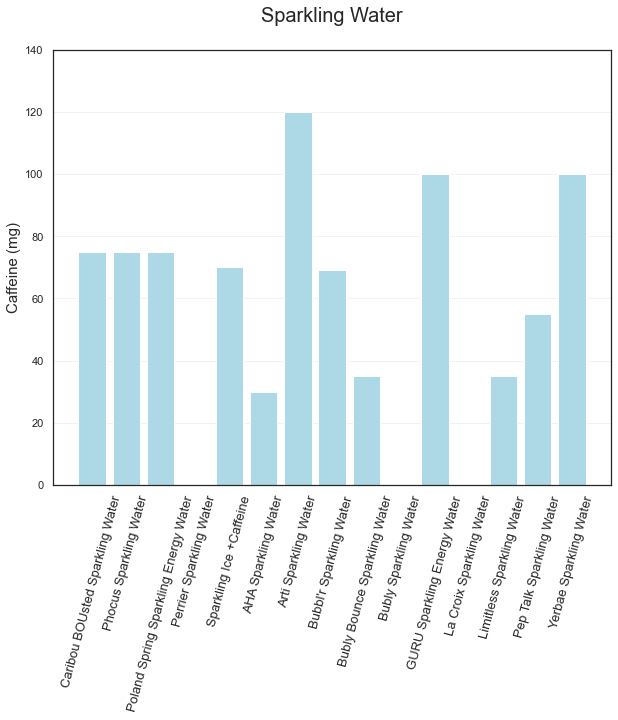

In [168]:
#Sparkling water
# step 1, get the data
x = df2water_sw .drink
y = df2water_sw ["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightblue")

# step 3, customization
plt.title("Sparkling Water\n", fontsize=20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=75, fontsize = 13)

# step 4, saving/showing
plt.show()

In [155]:
#df2water_sw.drink

In [156]:
df2water_ew= df2water.loc[df2water.drink.str.contains('Energy')].reset_index(drop = True)
df2water_ew ["subtype"]="Energy Water"
df2water_ew 

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml,subtype
0,Heroec Energy Water,499.79215,0,60,Water,12.004990,0.000000,Energy Water
1,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,22.052646,10.291235,Energy Water
2,VitaminWater Energy,591.47000,100,50,Water,8.453514,16.907028,Energy Water
3,Polar Frost Plus Energy,502.74950,10,67,Water,13.326716,1.989062,Energy Water
4,GURU Sparkling Energy Water,354.88200,0,100,Water,28.178380,0.000000,Energy Water
5,MiO Energy Water Enhancer,236.58800,0,60,Water,25.360542,0.000000,Energy Water


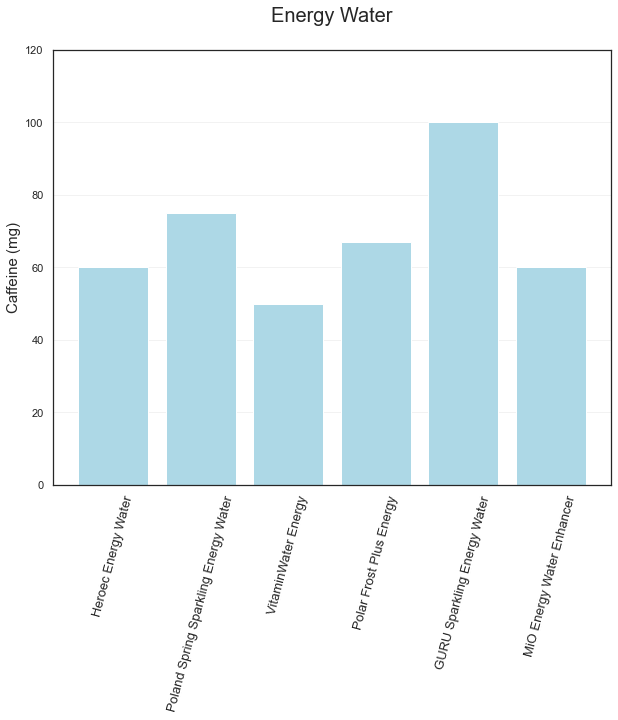

In [167]:
#Energy Water
# step 1, get the data
x = df2water_ew .drink
y = df2water_ew ["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightblue")

## step 3, customization
plt.title("Energy Water\n", fontsize=20)
plt.ylabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=75, fontsize = 13)

# step 4, saving/showing
plt.show()

In [158]:
# # Merge the two DataFrames,Sparkling and Energy Water
# merge5df = pd.merge(df2water_sw, df2water_ew, on=["subtype","drink", "Volume (ml)","Calories","Caffeine (mg)","subtype","caffeine_per_100ml","calories_per_100ml","type"],how="outer")
# merge5df

In [159]:
df2water=df2.loc[df2.type=="Water"].reset_index(drop=True)
df2water["subtype"]="Other"
i = 2
for i in range(len(df2water)):
    if (df2water.loc[i,"drink"].find("Sparkling") > -1):
        df2water.at[i,"subtype"] = "Sparkling"
    if (df2water.loc[i,"drink"].find("Energy") > -1):
        df2water.at[i,"subtype"] = "Energy"
df2water

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_100ml,Calories_per_100ml,subtype
0,Perrier Energize,250.191810,35,99,Water,39.569641,13.989267,Other
1,3 Water,499.792150,0,50,Water,10.004159,0.000000,Other
2,Heroec Energy Water,499.792150,0,60,Water,12.004990,0.000000,Energy
3,Caribou BOUsted Sparkling Water,340.095250,0,75,Water,22.052646,0.000000,Sparkling
4,Phocus Sparkling Water,340.095250,0,75,Water,22.052646,0.000000,Sparkling
5,Poland Spring Sparkling Energy Water,340.095250,35,75,Water,22.052646,10.291235,Energy
6,Perrier Sparkling Water,329.744525,0,0,Water,0.000000,0.000000,Sparkling
7,VitaminWater Energy,591.470000,100,50,Water,8.453514,16.907028,Energy
8,VitaRain Zero Enhanced Water,591.470000,0,42,Water,7.100952,0.000000,Other
9,Water Joe,591.470000,0,70,Water,11.834920,0.000000,Other


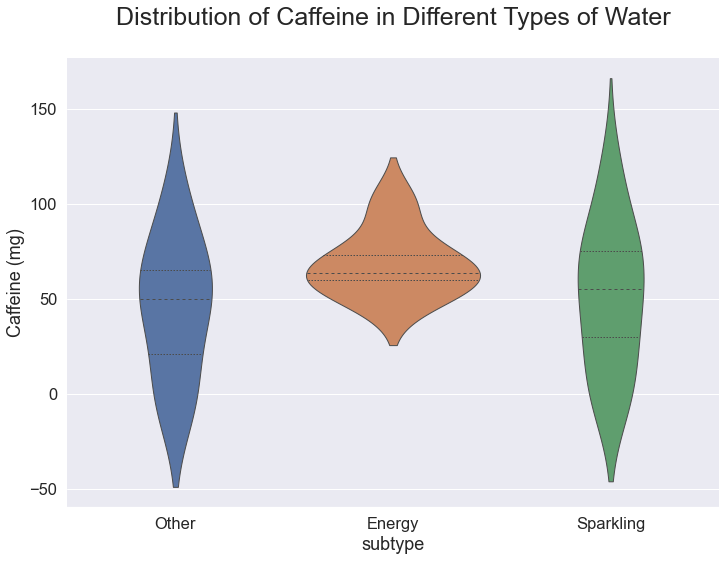

In [160]:
#VIOLIN CHART OF 3 brands
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=df2water, x="subtype", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Caffeine in Different Types of Water\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

In [ ]:
df2tea=df2.loc[df2.type=="Tea"].reset_index(drop=True)
df2tea